
# Accidents EDA
Purpose: 
* Review data and clean up data

# Data Definitions from Kaggle

## Data Summary
<font color='blue'> **This is a countrywide car accident dataset, which covers 49 states of the United States**
* The data is collected from **February 2016 to early 2020**, using several data providers, including two APIs that provide streaming traffic incident data
* These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks
* Currently, there are almost 3.0 million accident records in this dataset </font>
    

## Data Defenitions 
* **ID** - This is a unique identifier of the accident record.
* **Source** - Indicates source of the accident report (i.e. the API which reported the accident.).
* **TMC** - A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.
* <font color='firebrick'> **Severity** - Shows the severity of the accident, a number between 1 and 4, where
    * 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) 
    * 4 indicates a significant impact on traffic (i.e., long delay) </font>
* **Start_Time** - Shows start time of the accident in local time zone.
* **End_Time** - Shows end time of the accident in local time zone.
* **Start_Lat** - Shows latitude in GPS coordinate of the start point.
* **Start_Lng** - Shows longitude in GPS coordinate of the start point.
* **End_Lat** - Shows latitude in GPS coordinate of the end point.
* **End_Lng** - Shows longitude in GPS coordinate of the end point.
* **Distance(mi)** -The length of the road extent affected by the accident.
* **Description** - Shows natural language description of the accident.
* **Number** - Shows the street number in address field.
* **Street** - Shows the street name in address field.
* **Side** - Shows the relative side of the street (Right/Left) in address field.
* **City** - Shows the city in address field.
* **County** - Shows the county in address field.
* **State** - Shows the state in address field.
* **Zipcode** - Shows the zipcode in address field.
* **Country** - Shows the country in address field.
* **Timezone** - Shows timezone based on the location of the accident (eastern, central, etc.).
* **Airport_Code** -Denotes an airport-based weather station which is the closest one to location of the accident.
* **Weather_Timestamp** - Shows the time-stamp of weather observation record (in local time).
* **Temperature(F)** - Shows the temperature (in Fahrenheit).
* **Wind_Chill(F)** - Shows the wind chill (in Fahrenheit).
* **Humidity(%)** - Shows the humidity (in percentage).
* **Pressure(in)** - Shows the air pressure (in inches).
* **Visibility(mi)** - Shows visibility (in miles).
* **Wind_Direction** - Shows wind direction.
* **Wind_Speed(mph)** - Shows wind speed (in miles per hour).
* **Precipitation(in)** - Shows precipitation amount in inches, if there is any.
* **Weather_Condition** - Shows the weather condition (rain, snow, thunderstorm, fog, etc.).
* **Amenity** - A Point-Of-Interest (POI) annotation which indicates presence of amenity in a nearby location.
* **Bump** - A POI annotation which indicates presence of speed bump or hump in a nearby location.
* **Crossing** - A POI annotation which indicates presence of crossing in a nearby location.
* **Give_Way** - A POI annotation which indicates presence of give_way sign in a nearby location.
* **Junction** - A POI annotation which indicates presence of junction in a nearby location.
* **No_Exit** - A POI annotation which indicates presence of no_exit sign in a nearby location.
* **Railway** - A POI annotation which indicates presence of railway in a nearby location.
* **Roundabout** - A POI annotation which indicates presence of roundabout in a nearby location.
* **Station** - A POI annotation which indicates presence of station (bus, train, etc.) in a nearby location.
* **Stop** - A POI annotation which indicates presence of stop sign in a nearby location.
* **Traffic_Calming** - A POI annotation which indicates presence of traffic_calming means in a nearby location.
* **Traffic_Signal** - A POI annotation which indicates presence of traffic_signal in a nearby location.
* **Turning_Loop** - A POI annotation which indicates presence of turning_loop in a nearby location.
* **Sunrise_Sunset** - Shows the period of day (i.e. day or night) based on sunrise/sunset.
* **Civil_Twilight** - Shows the period of day (i.e. day or night) based on civil twilight.
* **Nautical_Twilight** - Shows the period of day (i.e. day or night) based on nautical twilight.
* **Astronomical_Twilight** - Shows the period of day (i.e. day or night) based on astronomical twilight. 

# Initial setup

## Import main libraries

In [88]:
from openpyxl import load_workbook

# os for setting the folder for saving work
import os

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebooks
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

import plotly.express as px

# from ipywidgets import interactive
# from ipywidgets import Dropdown

# Import data from csv
* This process take 32 seconds for 3 million rows
* Comment out code because this is a one time process
* Use existing index instead of having pandas create a new index

In [40]:
# df = pd.read_csv(r'../data/US_Accidents_Dec19.csv', index_col='ID')
# df

# Use Pickle 
## Save off data in a pickle format
* Took 10 seconds to save file in a pickle format 
* Comment out this code because saving the file is 1 time process as well

In [41]:
# df.to_pickle('../data/US_Accidents_Dec19.pkl')

## Re-Import table using pickle
* Only takes 5 seconds to load data using pickle

In [42]:
df = pd.read_pickle('../data/US_Accidents_Dec19.pkl')
#df

# Review data types 
## Overall Review
* Check the number of non-nulls for each columns
* Run describe for numerical and non-numerical fields

In [43]:
df.info(null_counts = True)

C:\Users\Miguel\AppData\Local\Temp\ipykernel_8832\1227896949.py:1: FutureWarning:

null_counts is deprecated. Use show_counts instead



<class 'pandas.core.frame.DataFrame'>
Index: 2974335 entries, A-1 to A-2974358
Data columns (total 48 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Source                 2974335 non-null  object 
 1   TMC                    2246264 non-null  float64
 2   Severity               2974335 non-null  int64  
 3   Start_Time             2974335 non-null  object 
 4   End_Time               2974335 non-null  object 
 5   Start_Lat              2974335 non-null  float64
 6   Start_Lng              2974335 non-null  float64
 7   End_Lat                728071 non-null   float64
 8   End_Lng                728071 non-null   float64
 9   Distance(mi)           2974335 non-null  float64
 10  Description            2974334 non-null  object 
 11  Number                 1056730 non-null  float64
 12  Street                 2974335 non-null  object 
 13  Side                   2974335 non-null  object 
 14  City               

In [44]:
pd.options.display.float_format = '{:,.0f}'.format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TMC,"2,246,264",208,20,200,201,201,201,406
Severity,"2,974,335",2,1,1,2,2,3,4
Start_Lat,"2,974,335",36,5,25,34,36,40,49
Start_Lng,"2,974,335",-95,17,-125,-117,-90,-81,-67
End_Lat,"728,071",38,5,25,34,38,41,49
End_Lng,"728,071",-100,18,-124,-118,-97,-82,-67
Distance(mi),"2,974,335",0,2,0,0,0,0,334
Number,"1,056,730","5,837","15,159",0,837,"2,717","7,000","9,999,997"
Temperature(F),"2,918,272",62,19,-78,50,64,76,171
Wind_Chill(F),"1,121,712",51,25,-66,32,54,73,115


In [45]:
df.describe(include=[object]).T.style.format({'count': '{:,.0f}', 'unique': '{:,.0f}', 'freq':'{:,.0f}'})

,count,unique,top,freq
Source,"2,974,335",3,MapQuest,"2,204,098"
Start_Time,"2,974,335","2,743,101",2017-05-15 09:22:55,74
End_Time,"2,974,335","2,761,499",2017-05-15 15:22:55,73
Description,"2,974,334","1,597,506",At I-15 - Accident.,"1,212"
Street,"2,974,335","160,715",I-5 N,"34,693"
Side,"2,974,335",3,R,"2,438,139"
City,"2,974,252","11,685",Houston,"93,289"
County,"2,974,335","1,713",Los Angeles,"227,180"
State,"2,974,335",49,CA,"663,204"
Zipcode,"2,973,455","377,152",91706,"4,646"


# Drop, update data types, and add columns 
* To make the dataset easier to work with

## Drop Country column
* Only contains `US` as a singular data point

In [46]:
df = df.drop(columns=['Country'])

## Review Data by Year
* Convert `Start_Time`, `End_Time`, and `Weather_Timestamp` from **object** to **datetime** format
* Create `Start_Year` and `Start_Month` columns from `Start_Time` 
* Create `Accident_Count` to make it easier to summarize values

In [47]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'] )
df['End_Time'] = pd.to_datetime(df['End_Time'] )
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'] )

In [48]:
df['Start_Year'] = df.Start_Time.dt.year
df['Start_Month'] = df.Start_Time.dt.month
df['Accident_Count'] = 1

In [49]:
pd.pivot_table(df, columns = 'Start_Year'
                        , index = 'Start_Month'
                        , values = 'Accident_Count'
                        , aggfunc = np.sum
                        , fill_value = 0
                        , margins = True
                        ).style.format ('{0:,.0f}') 


Start_Year,2015,2016,2017,2018,2019,2020,All
Start_Month,,,,,,,
1,0,7,"55,680","75,004","79,275",6,"209,972"
2,0,985,"51,640","71,468","74,556",0,"198,649"
3,1,"6,329","57,283","74,418","69,396",0,"207,427"
4,0,"18,088","48,087","72,588","73,000",0,"211,763"
5,0,"17,610","41,106","76,476","73,868",0,"209,060"
6,0,"30,527","46,221","67,781","65,496",0,"210,025"
7,0,"45,759","43,225","65,743","68,232",0,"222,959"
8,0,"56,425","80,872","76,379","75,236",0,"288,912"
9,0,"54,664","76,818","73,282","87,666",0,"292,430"


## Will remove 2015, 2016, and 2020 data
For this analysis I want to be able to full year comparisons. Therefore, I will remove the following data because:
* 2016 data is missing a few months and seem to be under reported
* 2015 seems to be incorrect data input
* 2020 is just a few records 

In [50]:
#df = df[(df['Start_Year'] > 2016) & (df['Start_Year'] < 2020)]
df = df.drop(df[(df['Start_Year'] < 2017) | (df['Start_Year'] > 2019)].index) 

In [51]:
pd.pivot_table(df, columns = 'Start_Year'
                        , index = 'Start_Month'
                        , values = 'Accident_Count'
                        , aggfunc = np.sum
                        , fill_value = 0
                        , margins = True
                        ).style.format ('{0:,.0f}')


Start_Year,2017,2018,2019,All
Start_Month,,,,
1,"55,680","75,004","79,275","209,959"
2,"51,640","71,468","74,556","197,664"
3,"57,283","74,418","69,396","201,097"
4,"48,087","72,588","73,000","193,675"
5,"41,106","76,476","73,868","191,450"
6,"46,221","67,781","65,496","179,498"
7,"43,225","65,743","68,232","177,200"
8,"80,872","76,379","75,236","232,487"
9,"76,818","73,282","87,666","237,766"


## Convert TMC Codes to Descriptions
* Collect codes from openstreetmap
    * Rename columns as needed
    * Drop unnecessary columns
* Them merge TMC Code stable to the existing data
* Fill in missing values with Unknown

In [52]:
import requests

In [53]:
url = 'https://wiki.openstreetmap.org/wiki/TMC/Event_Code_List'
html = requests.get(url).content
tmc_list = pd.read_html(html,index_col='Code',)
df_tmc = tmc_list[0]
df_tmc.index.name = 'TMC'
df_tmc.rename(columns = {'Description':'TMC_Description'}, inplace = True)
df_tmc

,TMC_Description,N,Q,T,D,U,C,R
TMC,,,,,,,,
1,traffic problem,NaN,0,D,1,U,1,A50
2,queuing traffic (with average speeds Q). Dange...,NaN,4,D,1,U,1,A2.A1D
11,overheight warning system triggered,NaN,0,(D),1,U,4,B50
12,"(Q) accident(s), traffic being directed around...",NaN,0,D,1,U,3,B1.Z95
16,"closed, rescue and recovery work in progress",NaN,0,D,1,U,5,C1.Z42
...,...,...,...,...,...,...,...,...
2043,road salted,NaN,0,D,1,NaN,14,Gnn
2044,danger of snow patches,NaN,0,D,2,U,14,GnnD
2045,snow patches,NaN,0,D,2,U,14,Gnn


In [54]:
df_tmc.columns[1:]

Index(['N', 'Q', 'T', 'D', 'U', 'C', 'R'], dtype='object')

In [55]:
df_tmc = df_tmc.drop(df_tmc.columns[1:],axis=1)
df_tmc.tail()

,TMC_Description
TMC,
2043,road salted
2044,danger of snow patches
2045,snow patches
2046,Convoy service required due to bad weather
2047,"(null message) {completely silent message, see..."


In [56]:
df= df.merge(df_tmc, left_on = 'TMC', right_on = 'TMC', how = 'left')
df

,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Year,Start_Month,Accident_Count,TMC_Description
0,MapQuest,201,3,2017-01-01 00:17:36,2017-01-01 00:47:12,38,-122,NaN,NaN,0,...,True,False,Night,Night,Night,Night,2017,1,1,(Q) accident(s)
1,MapQuest,201,3,2017-01-01 00:26:08,2017-01-01 01:16:06,38,-122,NaN,NaN,0,...,False,False,Night,Night,Night,Night,2017,1,1,(Q) accident(s)
2,MapQuest,201,2,2017-01-01 00:53:41,2017-01-01 01:22:35,38,-122,NaN,NaN,0,...,False,False,Night,Night,Night,Night,2017,1,1,(Q) accident(s)
3,MapQuest,241,3,2017-01-01 01:18:51,2017-01-01 01:48:01,38,-122,NaN,NaN,0,...,False,False,Night,Night,Night,Night,2017,1,1,(Q) accident(s). Right lane blocked
4,MapQuest,222,3,2017-01-01 01:20:12,2017-01-01 01:49:47,38,-122,NaN,NaN,0,...,True,False,Night,Night,Night,Night,2017,1,1,(Q) accident(s). Queuing traffic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563723,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34,-117,34,-117,1,...,False,False,Day,Day,Day,Day,2019,8,1,NaN
2563724,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,33,-117,33,-117,0,...,False,False,Day,Day,Day,Day,2019,8,1,NaN
2563725,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,34,-118,34,-118,1,...,False,False,Day,Day,Day,Day,2019,8,1,NaN
2563726,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,34,-118,34,-118,1,...,False,False,Day,Day,Day,Day,2019,8,1,NaN


## For missing TMC data give it the generic Accident code
* TMC = 201
* TMC_Description = '(Q) accident(s)'

In [57]:
df['TMC'] = df['TMC'].fillna(value = 20)
df['TMC_Description'] = df['TMC_Description'].fillna(value = '(Q) accident(s)')

In [58]:
df['TMC'] = df['TMC'].astype('Int64')
df

,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Year,Start_Month,Accident_Count,TMC_Description
0,MapQuest,201,3,2017-01-01 00:17:36,2017-01-01 00:47:12,38,-122,NaN,NaN,0,...,True,False,Night,Night,Night,Night,2017,1,1,(Q) accident(s)
1,MapQuest,201,3,2017-01-01 00:26:08,2017-01-01 01:16:06,38,-122,NaN,NaN,0,...,False,False,Night,Night,Night,Night,2017,1,1,(Q) accident(s)
2,MapQuest,201,2,2017-01-01 00:53:41,2017-01-01 01:22:35,38,-122,NaN,NaN,0,...,False,False,Night,Night,Night,Night,2017,1,1,(Q) accident(s)
3,MapQuest,241,3,2017-01-01 01:18:51,2017-01-01 01:48:01,38,-122,NaN,NaN,0,...,False,False,Night,Night,Night,Night,2017,1,1,(Q) accident(s). Right lane blocked
4,MapQuest,222,3,2017-01-01 01:20:12,2017-01-01 01:49:47,38,-122,NaN,NaN,0,...,True,False,Night,Night,Night,Night,2017,1,1,(Q) accident(s). Queuing traffic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563723,Bing,20,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34,-117,34,-117,1,...,False,False,Day,Day,Day,Day,2019,8,1,(Q) accident(s)
2563724,Bing,20,2,2019-08-23 19:11:30,2019-08-23 19:38:23,33,-117,33,-117,0,...,False,False,Day,Day,Day,Day,2019,8,1,(Q) accident(s)
2563725,Bing,20,2,2019-08-23 19:00:21,2019-08-23 19:28:49,34,-118,34,-118,1,...,False,False,Day,Day,Day,Day,2019,8,1,(Q) accident(s)
2563726,Bing,20,2,2019-08-23 19:00:21,2019-08-23 19:29:42,34,-118,34,-118,1,...,False,False,Day,Day,Day,Day,2019,8,1,(Q) accident(s)


In [59]:
pd.pivot_table(df
               , index = ['TMC','TMC_Description', 'Severity']
               , values = 'Accident_Count'
               , aggfunc = np.sum
               , fill_value = 0
               , margins = True
               ).style.format ('{0:,.0f}') 

In [60]:
pd.crosstab(df.TMC_Description, df.Severity, values=df.Accident_Count, aggfunc=np.sum, normalize=True,
           margins=True).style.format ('{0:,.4f}')

Severity,1,2,3,4,All
TMC_Description,,,,,
(Q th) entry slip road closed,0.0000,0.0007,0.0027,0.0000,0.0034
(Q) accident(s),0.0003,0.6209,0.2319,0.0297,0.8828
(Q) accident(s) in roadworks area,0.0000,0.0000,0.0000,0.0000,0.0000
(Q) accident(s). Hard shoulder blocked,0.0000,0.0020,0.0019,0.0000,0.0039
(Q) accident(s). Heavy traffic,0.0000,0.0003,0.0004,0.0000,0.0007
(Q) accident(s). Queuing traffic,0.0000,0.0011,0.0019,0.0000,0.0030
(Q) accident(s). Right lane blocked,0.0000,0.0350,0.0399,0.0002,0.0751
(Q) accident(s). Slow traffic,0.0000,0.0029,0.0024,0.0000,0.0053
(Q) accident(s). Three lanes blocked,0.0000,0.0005,0.0017,0.0000,0.0022


## Convert `Objects` to `Categorical` data type when less 2000 items
* List columns non-objects datatype i.e. numerical fields in order to exclude them
* Define function to find object columns datatype
    * Convert `Objects` with less that 2000 unique items to `Categories`

In [61]:
cols_to_exclude = list(df.select_dtypes(exclude=['object']))
for col in df.columns:
    if df[col].nunique() < 2000 and col not in cols_to_exclude:
        df[col] = df[col].astype('category')

In [62]:
df.info(null_counts = True)

C:\Users\Miguel\AppData\Local\Temp\ipykernel_8832\1227896949.py:1: FutureWarning:

null_counts is deprecated. Use show_counts instead



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2563728 entries, 0 to 2563727
Data columns (total 51 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Source                 2563728 non-null  category      
 1   TMC                    2563728 non-null  Int64         
 2   Severity               2563728 non-null  int64         
 3   Start_Time             2563728 non-null  datetime64[ns]
 4   End_Time               2563728 non-null  datetime64[ns]
 5   Start_Lat              2563728 non-null  float64       
 6   Start_Lng              2563728 non-null  float64       
 7   End_Lat                598735 non-null   float64       
 8   End_Lng                598735 non-null   float64       
 9   Distance(mi)           2563728 non-null  float64       
 10  Description            2563727 non-null  object        
 11  Number                 928540 non-null   float64       
 12  Street                 25637

In [86]:
df.to_csv('../data/US_Accidents_2016_2019.csv')

In [87]:
df.to_pickle('../data/US_Accidents_2016_2019.pkl')

# Develop data visualizations

## Create <span style="color:RoyalBlue">categorical</span> features list
By "including only" category data types

In [63]:
categorical_features = list(df.select_dtypes(include=['category']))
categorical_features

['Source',
 'Side',
 'County',
 'State',
 'Timezone',
 'Airport_Code',
 'Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight',
 'TMC_Description']

In [95]:
def create_barchart(tool,dataframe, y_column):
    df1 = dataframe.groupby([y_column])['Accident_Count'].sum()
    df1 = df1.reset_index()
    # If plotly then use this, else seaborn
    if tool == 'plotly':
        fig = px.bar(df1, y = y_column, x ='Accident_Count', orientation = 'h')
        fig.show()
    else:
        sns.barplot(data = df1, x ='Accident_Count',y=y_column)
        plt.show()


## Create <span style="color:RoyalBlue">barchart function to quickly review </span> categories

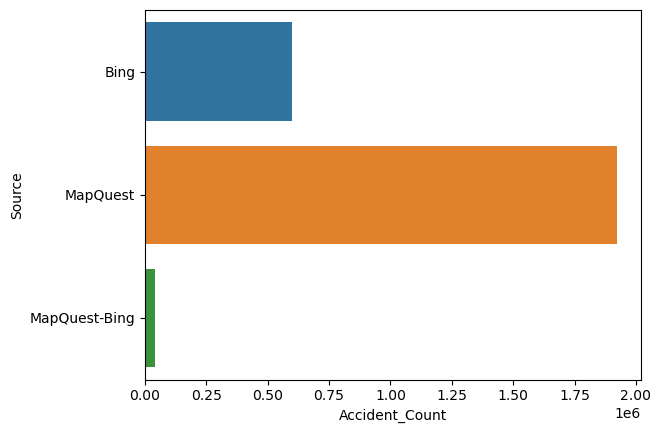

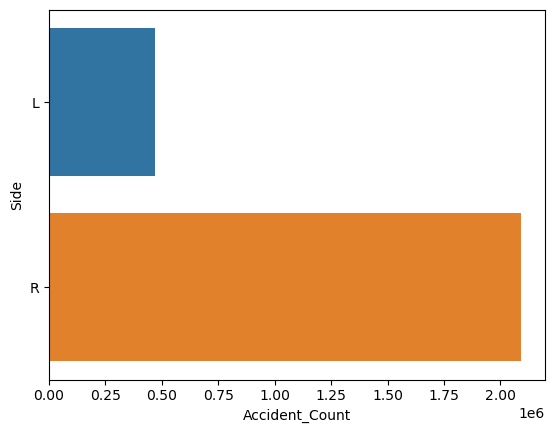

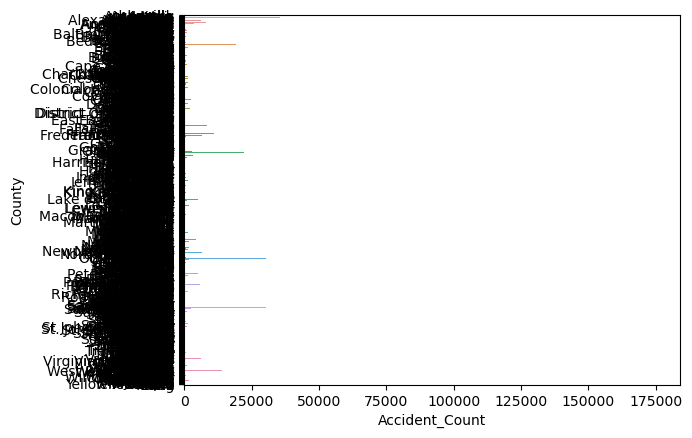

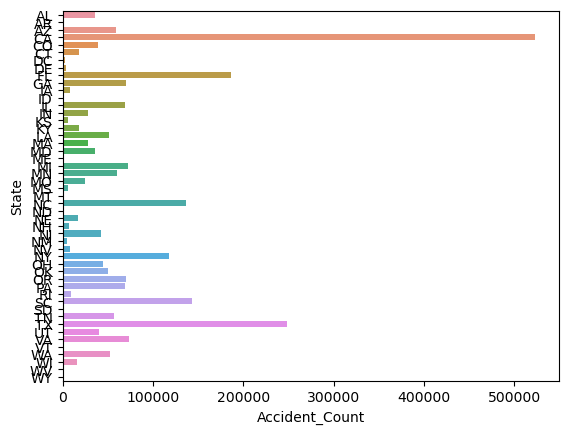

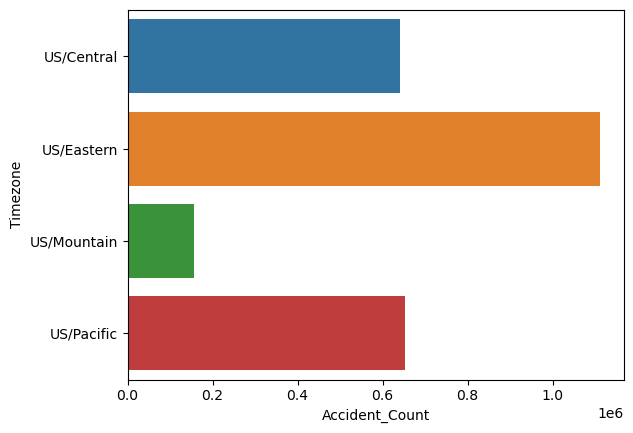

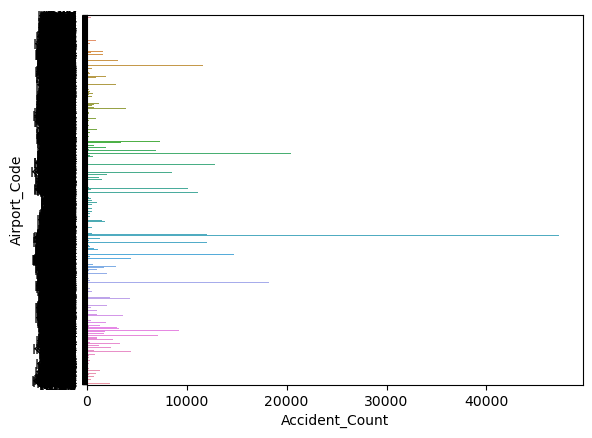

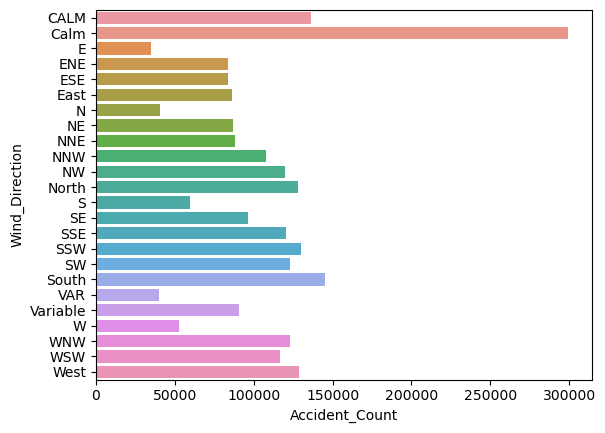

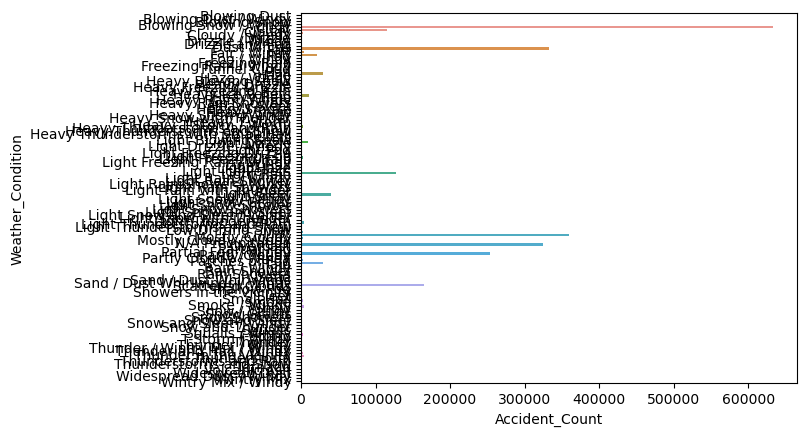

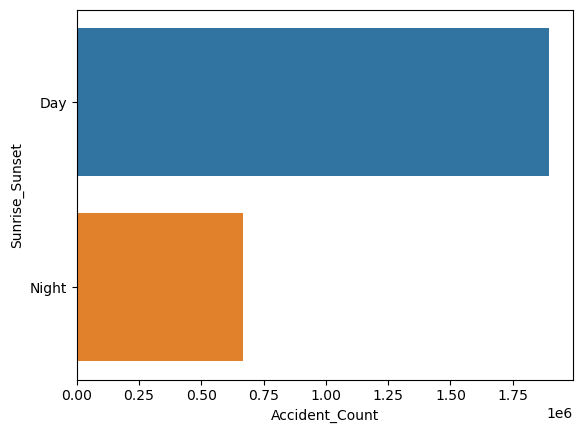

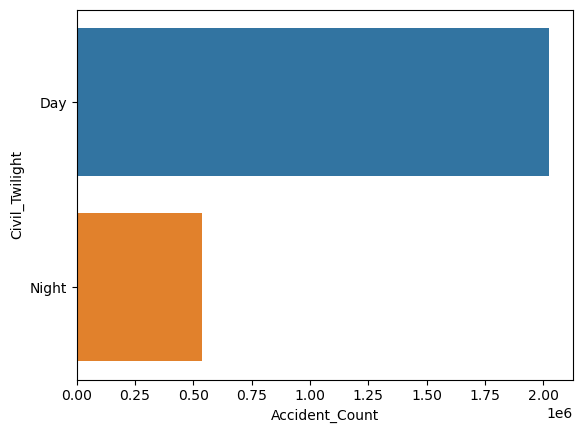

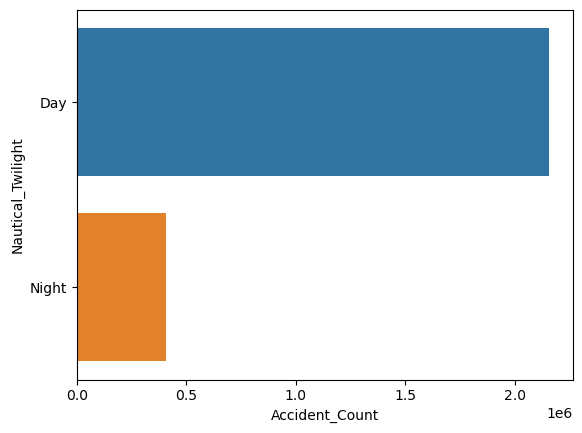

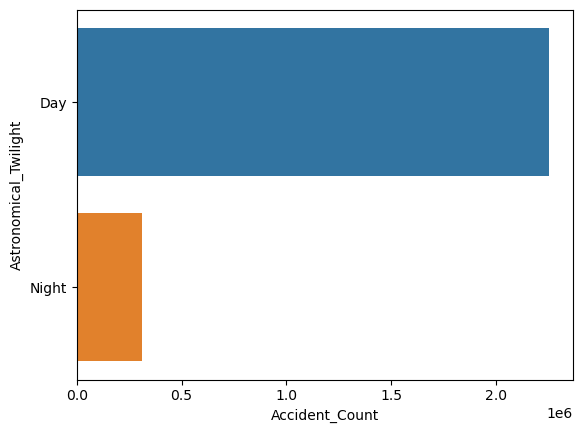

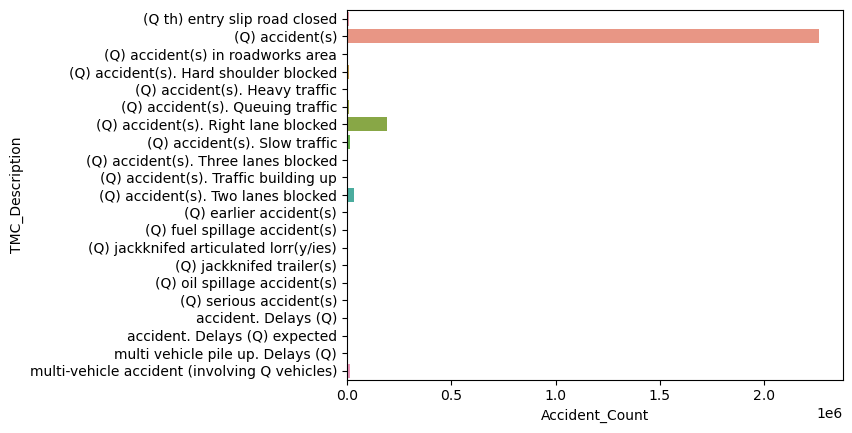

In [96]:
for cat in categorical_features:
    create_barchart('sns', df, cat )

# Create feature mappings: <span style="color:RoyalBlue">all</span>, <span style="color:RoyalBlue">numeric</span>, and <span style="color:RoyalBlue">categorical</span>
Creating these dataframes will make it easier to visualize the data

## Create feature mappings: <span style="color:RoyalBlue">all</span>, <span style="color:RoyalBlue">numeric</span>, and <span style="color:RoyalBlue">categorical</span>
Creating these dataframes will make it easier to visualize the data

# Review Categorical columns